In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pickle

In [17]:
import rpy2
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

from rpy2.robjects.packages import importr, data


utils = importr('utils')
base = importr('base')
%load_ext rpy2.ipython

In [225]:
def to_rdf(df):
    with (robjects.default_converter + pandas2ri.converter).context():
        rdf = robjects.conversion.get_conversion().py2rpy(df)
    return rdf

def to_df(rdf):
    with (robjects.default_converter + pandas2ri.converter).context():
        df = robjects.conversion.get_conversion().rpy2py(rdf)

    return df
summary = rpy2.robjects.r['summary']
coef = rpy2.robjects.r['coef']
rprint = rpy2.robjects.r['print']
plot = rpy2.robjects.r['plot']



In [19]:
%%R
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"


In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages


## Instalar pacotes do R localmente (só para seu usuário)
Talvez é necessário usar
```
utils.install_packages('mirt')
utils.install_packages('mirtCAT')

```
e o equivalente de outros pacotes. Deu erro instalar devtools desta forma, mas consegui instalar no rstudio.atp.usp.br. agora a linha abaixo funciona:

In [320]:
devtools.install_github('alexandrejaloto/microEnem')

R[write to console]: Downloading GitHub repo alexandrejaloto/microEnem@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

 1: All                                           
 2: CRAN packages only                            
 3: None                                          
 4: xfun         (0.39       -> 0.40      ) [CRAN]
 5: fs           (1.6.2      -> 1.6.3     ) [CRAN]
 6: magrittr     (1.5        -> 2.0.3     ) [CRAN]
 7: Rcpp         (1.0.10     -> 1.0.11    ) [CRAN]
 8: digest       (0.6.25     -> 0.6.33    ) [CRAN]
 9: sass         (0.4.6      -> 0.4.7     ) [CRAN]
10: bslib        (0.4.2      -> 0.5.1     ) [CRAN]
11: crayon       (1.3.4      -> 1.5.2     ) [CRAN]
12: promises     (1.2.0.1    -> 1.2.1     ) [CRAN]
13: R6           (2.4.1      -> 2.5.1     ) [CRAN]
14: htmltools    (0.5.5      -> 0.5.6     ) [CRAN]
15: fontawesome  (0.5.1      -> 0.5.2     ) [CRAN]
16: jsonlite     (1.8.4      -> 1.8.7     ) [CRAN]
17: gtable       (0.3.0      -> 0.3.4     ) [CRAN]
18: Rcp

Enter one or more numbers, or an empty line to skip updates:  1


xfun         (0.39       -> 0.40      ) [CRAN]
fs           (1.6.2      -> 1.6.3     ) [CRAN]
magrittr     (1.5        -> 2.0.3     ) [CRAN]
Rcpp         (1.0.10     -> 1.0.11    ) [CRAN]
digest       (0.6.25     -> 0.6.33    ) [CRAN]
sass         (0.4.6      -> 0.4.7     ) [CRAN]
bslib        (0.4.2      -> 0.5.1     ) [CRAN]
crayon       (1.3.4      -> 1.5.2     ) [CRAN]
promises     (1.2.0.1    -> 1.2.1     ) [CRAN]
R6           (2.4.1      -> 2.5.1     ) [CRAN]
htmltools    (0.5.5      -> 0.5.6     ) [CRAN]
fontawesome  (0.5.1      -> 0.5.2     ) [CRAN]
jsonlite     (1.8.4      -> 1.8.7     ) [CRAN]
gtable       (0.3.0      -> 0.3.4     ) [CRAN]
RcppArmad... (0.12.2.0.0 -> 0.12.6.4.0) [CRAN]
pbapply      (1.7-0      -> 1.7-2     ) [CRAN]
GPArotation  (2023.3-1   -> 2023.8-1  ) [CRAN]
lpSolve      (5.6.18     -> 5.6.19    ) [CRAN]
markdown     (1.7        -> 1.8       ) [CRAN]
shiny        (1.7.4      -> 1.7.5     ) [CRAN]
data.table   (NA         -> 1.14.8    ) [CRAN]


R[write to console]: Installing 21 packages: xfun, fs, magrittr, Rcpp, digest, sass, bslib, crayon, promises, R6, htmltools, fontawesome, jsonlite, gtable, RcppArmadillo, pbapply, GPArotation, lpSolve, markdown, shiny, data.table

R[write to console]: Installing packages into ‘/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/xfun_0.40.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 135575 bytes (132 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c base64.c -o base64.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o xfun.so base64.o init.o -L/usr/lib/R/lib -lR


installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-xfun/00new/xfun/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (xfun)
* installing *source* package ‘fs’ ...
** package ‘fs’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.cc -o init.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c id.cc -o id.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c file.cc -o file.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c path.cc -o path.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread     -fpic  -g -O2 -fstack-protector-str

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-fs/00new/fs/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fs)
* installing *source* package ‘magrittr’ ...
** package ‘magrittr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c pipe.c -o pipe.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c utils.c -o utils.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o magrittr.so pipe.o utils.o -L/usr/lib/R/lib -lR


installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-magrittr/00new/magrittr/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (magrittr)
* installing *source* package ‘Rcpp’ ...
** package ‘Rcpp’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c api.cpp -o api.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c attributes.cpp -o attributes.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c barrier.cpp -o barrier.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c date.cpp -o date.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-Rcpp/00new/Rcpp/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Rcpp)
* installing *source* package ‘digest’ ...
** package ‘digest’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I.     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c SpookyV2.cpp -o SpookyV2.o
gcc -I"/usr/share/R/include" -DNDEBUG -I.     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c aes.c -o aes.o
gcc -I"/usr/share/R/include" -DNDEBUG -I.     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c blake3.c -o blake3.o
gcc -I"/usr/share/R/include" -DNDEBUG -I.     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c blake3_dispatch.c -o blake3_dispatch.o
gcc -I"/usr/share/R/include" -DNDEBUG -I.     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c blake3_portable.c -o blake3_portable.o
gcc -I"/usr/share/R/include" -DNDEBUG -I.     -fpic  -g -O2 -fstack-protecto

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-digest/00new/digest/libs
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (digest)
* installing *source* package ‘crayon’ ...
** package ‘crayon’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of

gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api    -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c base64.c -o base64.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api    -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c collapse_array.c -o collapse_array.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api    -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c collapse_object.c -o collapse_object.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api    -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c collapse_pretty.c -o collapse_pretty.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api    -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-secu

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-jsonlite/00new/jsonlite/libs
** R
** inst
** byte-compile and prepare package for lazy loading


in method for ‘asJSON’ with signature ‘"AsIs"’: no definition for class “AsIs”
in method for ‘asJSON’ with signature ‘"ITime"’: no definition for class “ITime”
in method for ‘asJSON’ with signature ‘"hms"’: no definition for class “hms”
in method for ‘asJSON’ with signature ‘"json"’: no definition for class “json”
in method for ‘asJSON’ with signature ‘"integer64"’: no definition for class “integer64”
in method for ‘asJSON’ with signature ‘"pairlist"’: no definition for class “pairlist”
in method for ‘asJSON’ with signature ‘"blob"’: no definition for class “blob”
in method for ‘asJSON’ with signature ‘"scalar"’: no definition for class “scalar”
in method for ‘asJSON’ with signature ‘"sf"’: no definition for class “sf”
in method for ‘asJSON’ with signature ‘"sfc"’: no definition for class “sfc”
in method for ‘asJSON’ with signature ‘"vctrs_vctr"’: no definition for class “vctrs_vctr”


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (jsonlite)
* installing *source* package ‘gtable’ ...
** package ‘gtable’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (gtable)
* installing *source* package ‘pbapply’ ...
** package ‘pbapply’ successfu

gcc -I"/usr/share/R/include" -DNDEBUG -I . -DINTEGERTIME -DPARSER_LP -DBUILDING_FOR_R -DYY_NEVER_INTERACTIVE -DUSRDLL -DCLOCKTIME -DRoleIsExternalInvEngine -DINVERSE_ACTIVE=INVERSE_LUSOL -DINLINE=static -DParanoia     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c colamd.c -o colamd.o
gcc -I"/usr/share/R/include" -DNDEBUG -I . -DINTEGERTIME -DPARSER_LP -DBUILDING_FOR_R -DYY_NEVER_INTERACTIVE -DUSRDLL -DCLOCKTIME -DRoleIsExternalInvEngine -DINVERSE_ACTIVE=INVERSE_LUSOL -DINLINE=static -DParanoia     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c commonlib.c -o commonlib.o
gcc -I"/usr/share/R/include" -DNDEBUG -I . -DINTEGERTIME -DPARSER_LP -DBUILDING_FOR_R -DYY_NEVER_INTERACTIVE -DUSRDLL -DCLOCKTIME -DRoleIsExternalInvEngine -DINVERSE_ACTIVE=INVERSE_LUSOL -DINLINE=static -DParanoia     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-tim

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-lpSolve/00new/lpSolve/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lpSolve)
* installing *source* package ‘data.table’ ...
** package ‘data.table’ successfully unpacked and MD5 sums checked
** using staged installation


gcc 5.4.0
zlib 1.2.8 is available ok
R CMD SHLIB supports OpenMP without any extra hint
gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c assign.c -o assign.o


** libs


gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c between.c -o between.o
gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c bmerge.c -o bmerge.o
gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c chmatch.c -o chmatch.o
gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c cj.c -o cj.o
gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c coalesce.c -o coalesce.o
gcc -I"/usr/share/R/include" -DNDEBUG     -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wfo

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-data.table/00new/data.table/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (data.table)
* installing *source* package ‘promises’ ...
** package ‘promises’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/later/include' -I'/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/Rcpp/include'    -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/later/include' -I'/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/Rcpp/include'    -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c promise_task.cpp -o promise_task.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o promises.so RcppExports.o promise_task.o -L/usr/lib/R/lib -lR


installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-promises/00new/promises/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (promises)
* installing *source* package ‘htmltools’ ...
** package ‘htmltools’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c template.c -o template.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o htmltools.so init.o template.o -L/usr/lib/R/lib -lR


installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-htmltools/00new/htmltools/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (htmltools)
* installing *source* package ‘RcppArmadillo’ ...
** package ‘RcppArmadillo’ successfully unpacked and MD5 sums checked
** using staged installation


checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C++... yes
checking whether g++ -std=gnu++14 accepts -g... yes
checking for g++ -std=gnu++14 option to enable C++11 features... none needed
checking how to run the C++ preprocessor... g++ -std=gnu++14 -E
checking whether the compiler supports GNU C++... (cached) yes
checking whether g++ -std=gnu++14 accepts -g... (cached) yes
checking for g++ -std=gnu++14 option to enable C++11 features... (cached) none needed
checking whether we have a suitable tempdir... /tmp
checking whether R CMD SHLIB can already compile programs using OpenMP... yes
checking LAPACK_LIBS... system LAPACK found
configure: creating ./config.status
config.status: creating inst/include/RcppArmadillo/config/RcppArmadilloConfigGenerated.h
config.stat

** libs


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include -I'/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/Rcpp/include'   -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include -I'/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/Rcpp/include'   -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c fastLm.cpp -o fastLm.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o RcppArmadillo.so RcppArmadillo.o RcppExports.o fastLm.o -fopenmp -llapack -lblas -lgfortran -lm -lquadmath -L/usr/lib/R/lib -lR


installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-RcppArmadillo/00new/RcppArmadillo/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (RcppArmadillo)
* installing *source* package ‘markdown’ ...
** package ‘markdown’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location


gcc -I"/usr/share/R/include" -DNDEBUG -I./libsass/include     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c compile.c -o compile.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libsass/include     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.cpp -o init.o
MAKEFLAGS= CC="gcc" CFLAGS="-g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 " CXX="g++ -std=gnu++14" AR="ar" LDFLAGS="-Wl,-Bsymbolic-functions -Wl,-z,relro" make -C libsass
make[1]: Entering directory '/tmp/RtmpqfjKva/R.INSTALL5e28261fc7dd/sass/src/libsass'
gcc -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -O2 -I ./include  -fPIC -c -o src/cencode.o src/cencode.c
g++ -std=gnu++14 -Wall -O2 -std=c++11 -I ./include  -fPIC -c -o src/ast.o src/ast.cpp
g++ -std=gnu++14 -Wall -O2 -std=c++11 -I ./include  

installing to /dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-sass/00new/sass/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sass)
* installing *source* package ‘fontawesome’ ...
** package ‘fontawesome’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** te

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpNhJ8TN/remotes1c47162bbb500/alexandrejaloto-microEnem-547a5fe/DESCRIPTION’ ... OK
* preparing ‘microEnem’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘microEnem_0.0.0.9000.tar.gz’



R[write to console]: Installing package into ‘/dados1/home/ewout/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

* installing *source* package ‘microEnem’ ...
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (microEnem)


microEnem


In [20]:
mirt = importr('mirt')
mirtcat = importr("mirtCAT")

In [88]:
ano = 2010
item_info = pd.read_csv(f'../inep/enem/{ano}/DADOS/ITENS_PROVA_{ano}-utf8.csv',sep='\;',engine='python')
item_info.value_counts('TX_MOTIVO_ABAN')


TX_MOTIVO_ABAN
Não permitiu a convergência do algoritmo de estimação da TRI    92
Name: count, dtype: int64

In [91]:
item_info.query('IN_ITEM_ABAN == 1')

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA
20,21,CH,71954,A,5.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Azul,85,NaN
21,22,CH,73447,D,14.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Azul,85,NaN
24,25,CH,58553,C,7.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Azul,85,NaN
66,22,CH,73447,D,14.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Amarelo,86,NaN
68,24,CH,71954,A,5.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Amarelo,86,NaN
69,25,CH,58553,C,7.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Amarelo,86,NaN
109,20,CH,71954,A,5.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Branco,87,NaN
111,22,CH,73447,D,14.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Branco,87,NaN
114,25,CH,58553,C,7.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Branco,87,NaN
156,22,CH,73447,D,14.0,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Rosa,88,NaN


In [65]:
def load_acertos(ano,area,perc=1,remove_abandonados=True):
    'retornamos o df original com os itens + notas_inep e caderno e um com somente itens'
    df = pd.read_csv(f'data/ac_{perc}_{ano}_{area}.csv',index_col='candidato')
    resp = df.iloc[:,:-3] # assume que as últimas 3 colunas são acertos, nota_inep e caderno 
    if remove_abandonados:
        removed_columns = [col for col in resp.columns if col.endswith('-aban')]
        resp = resp.drop(columns=removed_columns)

    item_info = pd.read_csv(f'../inep/enem/{ano}/DADOS/ITENS_PROVA_{ano}-utf8.csv',sep='\;',engine='python')
    item_info.dropna(subset='CO_ITEM',inplace=True)
    item_info['CO_ITEM'] = item_info['CO_ITEM'].astype(int)
    item_info = item_info[item_info['SG_AREA'] == area]
    item_info = item_info.drop_duplicates(subset='CO_ITEM')
    return df,resp,item_info

#df,resp,item_info = load_acertos(2009,'CN',remove_abandonados=False)


In [205]:
def item_stats(ano,area):
    acertos, resp, item_info = load_acertos(ano, area,remove_abandonados=False)
    istats = mirt.itemstats(to_rdf(resp))
    istats = to_df(istats[1])
    #istats.index = istats.index.astype(int)
    #istats.index = istats.index
    item_info = item_info.drop_duplicates(subset=['CO_ITEM'],keep='first')
    item_info = item_info.set_index('CO_ITEM')
    item_info.index = item_info.index.astype(str)
    istats = pd.merge(istats,item_info,how='left',left_index=True,right_index=True,validate='1:m')
    istats = istats.drop(columns=['CO_HABILIDADE'])
    return istats
istats = item_stats(2012,'MT')

In [206]:
istats.sort_values('total.r',ascending=True)

,N,mean,sd,total.r,total.r_if_rm,alpha_if_rm,CO_POSICAO,SG_AREA,TX_GABARITO,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA
9173,33147,0.179564,0.383829,0.083900,0.031381,0.848065,158,MT,C,0,NaN,1.312,3.255,0.143,Cinza,150,NaN
10441,33147,0.132833,0.339399,0.094005,0.047639,0.847351,157,MT,E,0,NaN,2.042,3.236,0.108,Cinza,150,NaN
9214,33147,0.172715,0.378007,0.126777,0.075356,0.847202,148,MT,A,0,NaN,3.544,2.408,0.141,Rosa,152,NaN
7318,33147,0.190877,0.392998,0.134176,0.080773,0.847230,161,MT,C,0,NaN,2.309,2.521,0.160,Cinza,150,NaN
7421,33147,0.138172,0.345086,0.143663,0.096911,0.846578,139,MT,D,0,NaN,1.952,2.677,0.096,Azul,151,NaN
6086,33147,0.200440,0.400336,0.154798,0.100627,0.846911,138,MT,B,0,NaN,2.328,2.467,0.193,Azul,151,NaN
11010,33147,0.147132,0.354243,0.163032,0.115253,0.846323,160,MT,B,0,NaN,1.891,2.719,0.120,Cinza,150,NaN
12105,33147,0.237397,0.425494,0.182758,0.125563,0.846611,159,MT,D,0,NaN,1.240,3.242,0.180,Cinza,150,NaN
8371,33147,0.235466,0.424296,0.191473,0.134589,0.846415,165,MT,B,0,NaN,3.552,2.084,0.228,Cinza,150,NaN
15446,33147,0.276737,0.447392,0.206691,0.146959,0.846323,138,MT,C,0,NaN,1.786,1.911,0.138,Rosa,152,NaN


In [207]:
def load_model(ano,area,itemtype="3PL", method="EM", SE=True,remove_b=None):
    if remove_b:
        fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}-b{remove_b}'
    else:
        fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}'
    
    with open(fn,'rb') as pfile:
        model = pickle.load(pfile)
    return model

def estimate_irt(ano,area,itemtype="3PL", method="EM", SE=True,remove_b=None,write_model=True):
    'Estime o modelo. Se já foi estimado, e remove_b é dado, remova itens com abs(b) < remove_b e a < 0'
    df,resp,item_info = load_acertos(ano,area)
    
    if remove_b:
        model = load_model(ano,area,itemtype, method, SE)
        coefs = irt_coefs(model)
        resp.columns = resp.columns.astype(int)
        items_to_remove = coefs.query(f'abs(b) > {remove_b} | a < 0').index
        if len(items_to_remove) > 0:
            resp = resp.drop(columns=items_to_remove)
            print("removing items", coefs.query(f'b > {remove_b}').index)
            model = mirt.mirt(to_rdf(resp),1,itemtype=itemtype,method=method,SE=SE)
            fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}-b{remove_b}'
        else:
            print("No items do remove!")
            return 
    else:
        model = mirt.mirt(to_rdf(resp),1,itemtype=itemtype,method=method,SE=SE)
        fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}'
    if write_model:
        with open(fn, 'wb') as pfile:
            pickle.dump(model,pfile)
        
    return model


for ano in range(2009,2023):
    for area in ['MT','CN','CH']:
        print(f"Ano = {ano}, area = {area}") 
        #_ = estimate_irt(ano,area)
        #_ = estimate_irt(ano,area,remove_b=5)

Ano = 2009, area = MT
Ano = 2009, area = CN
Ano = 2009, area = CH
Ano = 2010, area = MT
Ano = 2010, area = CN
Ano = 2010, area = CH
Ano = 2011, area = MT
Ano = 2011, area = CN
Ano = 2011, area = CH
Ano = 2012, area = MT
Ano = 2012, area = CN
Ano = 2012, area = CH
Ano = 2013, area = MT
Ano = 2013, area = CN
Ano = 2013, area = CH
Ano = 2014, area = MT
Ano = 2014, area = CN
Ano = 2014, area = CH
Ano = 2015, area = MT
Ano = 2015, area = CN
Ano = 2015, area = CH
Ano = 2016, area = MT
Ano = 2016, area = CN
Ano = 2016, area = CH
Ano = 2017, area = MT
Ano = 2017, area = CN
Ano = 2017, area = CH
Ano = 2018, area = MT
Ano = 2018, area = CN
Ano = 2018, area = CH
Ano = 2019, area = MT
Ano = 2019, area = CN
Ano = 2019, area = CH
Ano = 2020, area = MT
Ano = 2020, area = CN
Ano = 2020, area = CH
Ano = 2021, area = MT
Ano = 2021, area = CN
Ano = 2021, area = CH
Ano = 2022, area = MT
Ano = 2022, area = CN
Ano = 2022, area = CH


In [311]:
ano, area = 2009, 'CH'
df,resp,item_info = load_acertos(ano,area)
len(resp.columns)

45

In [312]:
s = '''
F = 1-43
PRIOR = (1-43,d,norm, 0, 2)
PRIOR = (1-43,a1,lnorm, .2, .2)
START = (1-43,g,0.2)
FIXED = (1-43,g)
'''

In [313]:
s = '''
F = 1-43
PRIOR = (1-43,d,norm, 0, 10)
PRIOR = (1-43,a1,lnorm, .2, .5)
'''
mirtmodel = mirt.mirt_model(s)
#mirtmodel = mirt.mirt_model("1")
model = mirt.mirt(to_rdf(resp),mirtmodel,itemtype='3PL',method='EM',SE=False)

Iteration: 76, Log-Lik: -596259.952, Max-Change: 0.00293


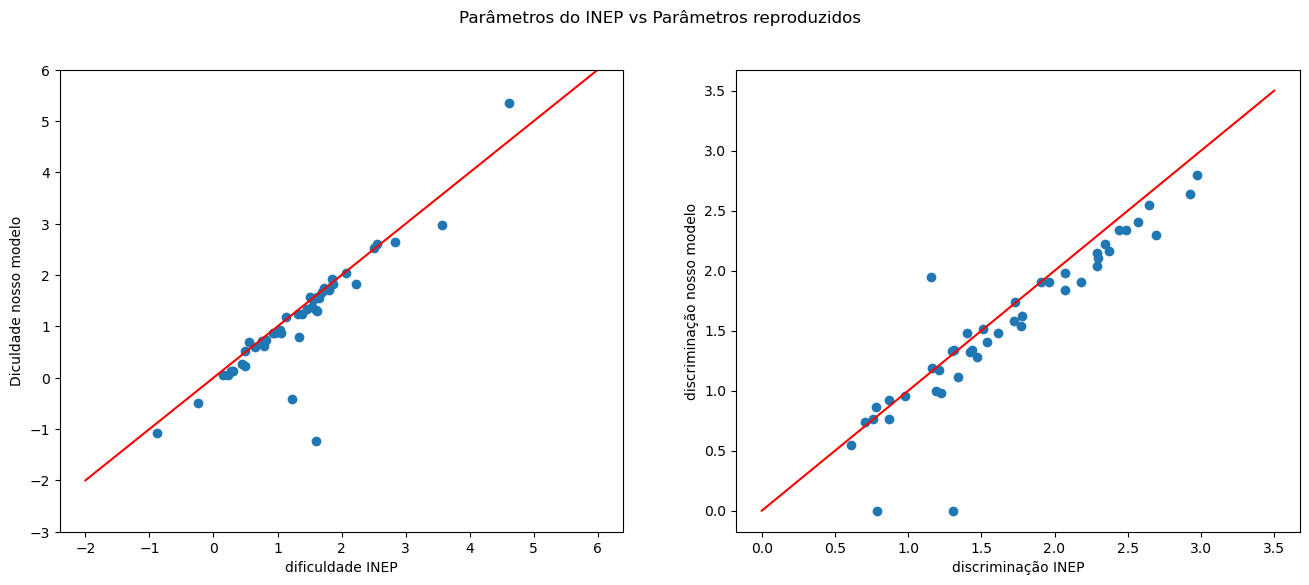

In [315]:
irtparams = pd.merge(irt_coefs(model),item_info.set_index('CO_ITEM'),left_index=True,right_index=True)
fig, axs = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = axs[0],axs[1]
#plt.errorbar(comp_coef['d'],comp_coef['b'],yerr=comp_coef['b_se'],fmt='o')
ax1.scatter(irtparams['NU_PARAM_B'],irtparams['b'])
ax1.plot([-2,6],[-2,6],'r')
ax1.set_ylim(-3,6)
fig.suptitle("Parâmetros do INEP vs Parâmetros reproduzidos")
ax1.set_ylabel("Diculdade nosso modelo");
ax1.set_xlabel("dificuldade INEP");
ax2.scatter(irtparams['NU_PARAM_A'],irtparams['a'])
ax2.plot([0,3.5],[0,3.5],'r')
ax2.set_ylabel("discriminação nosso modelo");
ax2.set_xlabel("discriminação INEP");

In [253]:
to_df(mirt.itemfit(model,fit_stats="infit"))

,item,outfit,z.outfit,infit,z.infit
1,60226,0.821411,-16.254106,0.895152,-12.710896
2,60227,0.965395,-1.744706,0.999721,-0.010905
3,60228,0.990917,-1.296771,0.992187,-1.151179
4,60229,0.985943,-0.899783,0.988047,-0.862613
5,60230,0.839733,-24.300924,0.877238,-24.006867
6,60231,0.970782,-3.105440,0.976165,-2.796772
7,60232,0.930462,-10.922702,0.946567,-9.493741
8,60233,0.987468,-1.060954,0.996012,-0.349499
9,58672,0.997049,-0.383102,0.997906,-0.274148
10,60235,0.878043,-24.605452,0.898981,-28.656325


In [141]:
def irt_coefs(model):
    coef = rpy2.robjects.r['coef']
    coefs = coef(model,simplify=False,IRTpars=True,printSE=True,verbose=True)
    coefs = to_df(coefs)
    #coefs = pd.DataFrame([np.concatenate([value[0],value[1]]) for key,value in coefs.items()],index=coefs.keys(),columns=['a','b','c','u','a_se','b_se','c_se','u_se'])
    # se o coef acima não fornece erros padrão
    coefs = pd.DataFrame([value[0] for key,value in coefs.items()],index=coefs.keys(),columns=['a','b','c','u'])
    coefs = coefs.drop(index="GroupPars")
    coefs = coefs.set_index(coefs.index.astype('int'))
    coefs = coefs.drop(columns=['u'])
    return coefs



In [170]:
ano,area = 2011,'CH'
model = load_model(ano,area)
coefs = irt_coefs(model).sort_values('b',ascending=False)
coefs = coefs.join(item_stats(ano,area))


In [186]:
coefs.query(f'abs(b) > {remove_b} | a < 0')

,a,b,c,N,mean,sd,total.r,total.r_if_rm,alpha_if_rm,CO_POSICAO,SG_AREA,TX_GABARITO,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
117798,0.073710,27.800580,0.049569,31478,0.158237,0.364969,0.063466,-0.002252,0.763969,142,MT,A,2.72919,1.92868,0.23186,Cinza,518,NaN,0
18002,-2.453985,-1.951424,0.146522,31478,0.195883,0.396885,0.062631,-0.008846,0.764825,158,MT,C,3.41848,1.95818,0.16938,Cinza,518,NaN,0
17642,-0.192189,-11.300719,0.075666,31478,0.171485,0.376938,0.031541,-0.036323,0.765393,138,MT,D,2.24304,2.30004,0.20665,Rosa,517,NaN,0
83955,0.122937,12.624557,0.038534,31478,0.207256,0.405347,0.099906,0.027048,0.763638,140,MT,D,2.58330,1.63345,0.16356,Rosa,517,NaN,0
39708,-0.038448,-54.507957,0.103747,31478,0.201951,0.401462,0.075108,0.002831,0.764482,156,MT,C,2.45518,2.61221,0.15911,Azul,515,NaN,0


In addition: There were 28 warnings (use warnings() to see them)


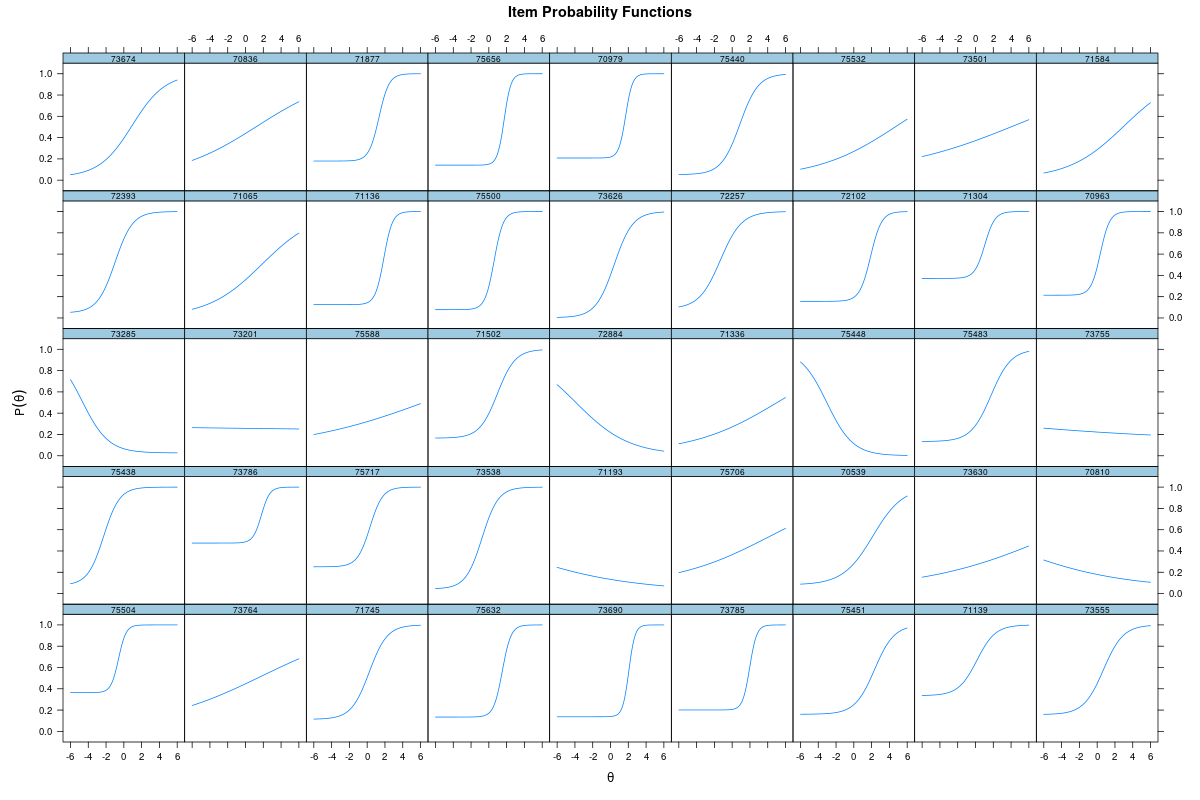

In [173]:
%%R -i model -w 1200 -h 800
plot(model,type="trace", facet_items=TRUE)

In [106]:
def calc_thetas(model,method="EAP"):
    thetas = mirt.fscores(model,method="EAP",full_scores=True,full_scores_SE=True)
    return to_df(thetas)[:,0], to_df(thetas)[:,1]

model = load_model(2022,'MT')
thetas,thetasse = calc_thetas(model)
thetasse

array([0.29003791, 0.59880601, 0.46667889, ..., 0.34895369, 0.50024662,
       0.62966006])

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='thetas1', ylabel='Count'>

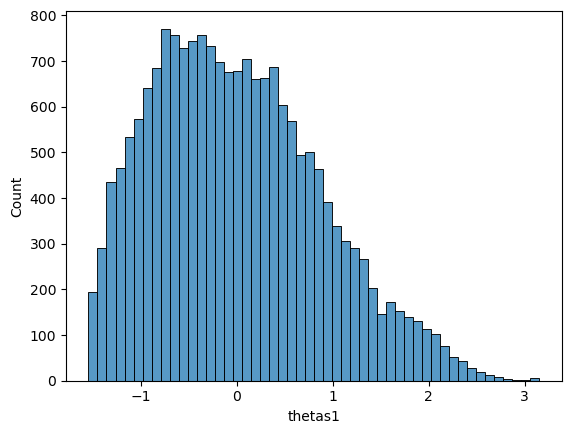

In [132]:
sns.histplot(df,x='thetas1')

In [133]:
df[['nota_inep','thetas1']].corr()

,nota_inep,thetas1
nota_inep,1.000000,0.993287
thetas1,0.993287,1.000000


/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nota nosso modelo')

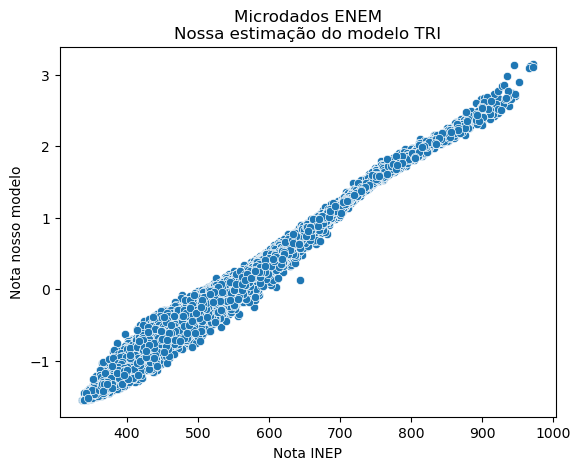

In [134]:
ax = sns.scatterplot(df,y='thetas1',x='nota_inep')
ax.set_title("Microdados ENEM\nNossa estimação do modelo TRI")
ax.set_xlabel("Nota INEP")
ax.set_ylabel("Nota nosso modelo")
#sns.scatterplot(df,x='acertos',y='theta3plmap')

## INEP Item coefficients 

In [112]:
def irt_coefs_inep(ano,area):
    df, resp, item_info = load_acertos(ano,area)
    resp.columns = resp.columns.astype(int)
    params = item_info[item_info["CO_ITEM"].isin(resp.columns)]
    if len(params) != len(resp.columns):
        print(f"Warning: params has length {len(params)} while resp has {len(resp.columns)} columns")
    params = params[["CO_ITEM","NU_PARAM_A","NU_PARAM_B","NU_PARAM_C"]]
    params = params.set_index("CO_ITEM")
    params.columns = ["a_inep","b_inep","c_inep"]
    return params
    

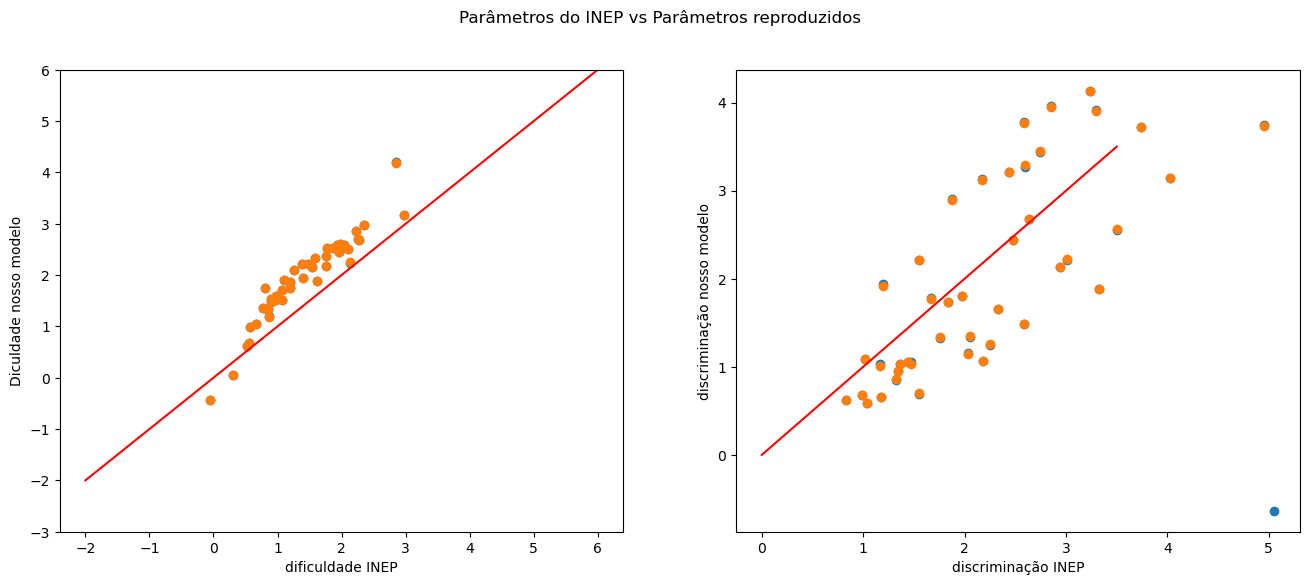

In [194]:
ano,area = 2014,'CN'

model = load_model(ano,area)
try:
    model6 = load_model(ano,area,remove_b=5)
except FileNotFoundError:
    model6 = model

coefs = irt_coefs(model)
coefs = coefs.join(item_stats(ano,area))
coefs6 = irt_coefs(model6)
coefs6 = coefs6.join(item_stats(ano,area))

#comp_coef = pd.merge(coefs,params,left_index=True,right_index=True)

fig, axs = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = axs[0],axs[1]
#plt.errorbar(comp_coef['d'],comp_coef['b'],yerr=comp_coef['b_se'],fmt='o')
ax1.scatter(coefs['NU_PARAM_B'],coefs['b'])
ax1.scatter(coefs6['NU_PARAM_B'],coefs6['b'])
ax1.plot([-2,6],[-2,6],'r')
ax1.set_ylim(-3,6)
fig.suptitle("Parâmetros do INEP vs Parâmetros reproduzidos")
ax1.set_ylabel("Diculdade nosso modelo");
ax1.set_xlabel("dificuldade INEP");
ax2.scatter(coefs['NU_PARAM_A'],coefs['a'])
ax2.scatter(coefs6['NU_PARAM_A'],coefs6['a'])
ax2.plot([0,3.5],[0,3.5],'r')
ax2.set_ylabel("discriminação nosso modelo");
ax2.set_xlabel("discriminação INEP");

<AxesSubplot:xlabel='ineptheta', ylabel='nota_inep'>

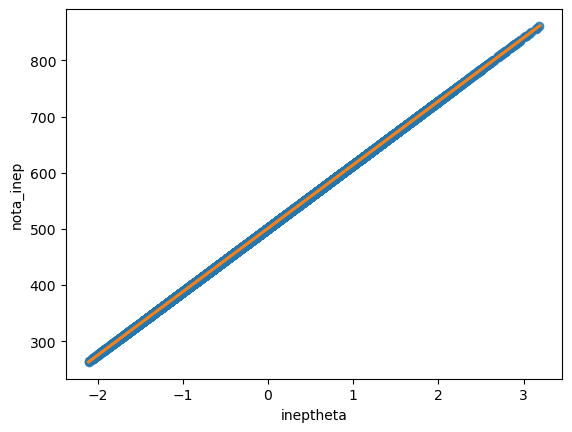

In [116]:
ano, area = 2009, 'CN'
inep_params = irt_coefs_inep(ano,area)
inep_params['u'] = 1 # a função generate_mirt_object abaixo requer 4 parâmetros para cada item.
# os itens devem corresponder aos das padrões de resposta dos candidatos (o variável resp abaixo).
inep_params = inep_params.sort_index() 
# transformar os parâmetros (essencialmente a da dificuldade) de IRT para "slope / intercept" do mirt.
inep_params = mirt.traditional2mirt(to_rdf(inep_params),"3PL")
mod_inep = mirtcat.generate_mirt_object(to_rdf(inep_params),itemtype = '3PL')
df, resp, item_info = load_acertos(ano,area)
resp.columns = resp.columns.astype(int)
resp = resp.sort_index(axis=1) # se não fizer isso, os itens (colunas nestas padrões de resposta) não correspondem ao modelo mod_inep acima
inepthetas= mirt.fscores(mod_inep,method="EAP",full_scores=True,returnER=False,verbose=True ,response_pattern = to_rdf(resp))
df['ineptheta'] = to_df(inepthetas)[:,0]
df['ineptheta_se'] = to_df(inepthetas)[:,1]

sns.regplot(df,x='ineptheta',y='nota_inep',ci=None,line_kws={"color": "C1"})
#plt.errorbar(df['ineptheta'],df['nota_inep'],xerr=df['ineptheta_se'],errorevery=100,ecolor='mediumblue',alpha=0.4)

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='nota_inep', ylabel='Count'>

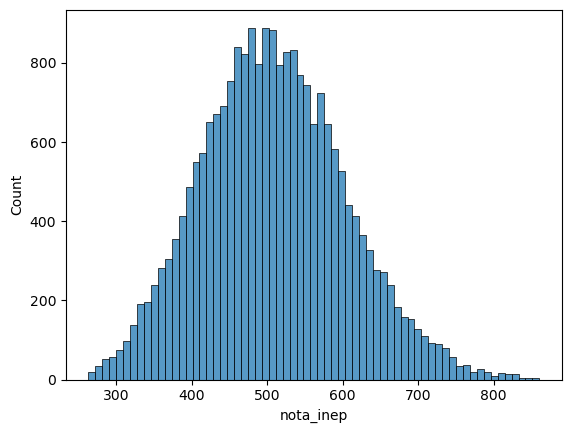

In [117]:
sns.histplot(df,x='nota_inep')

In [109]:
df.query('nota_inep > 800 & ineptheta < 0' )

,38545,61391,41659,32149,81583,33017,82507,26277,28143,49204,...,40302,62901,41816,39806,14712,acertos,caderno,nota_inep,ineptheta,ineptheta_se
candidato,,,,,,,,,,,,,,,,,,,,,
150005340871,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,12,243,803.7,-1.059353,0.651251


In [5]:
mt2015 = pd.read_csv('data/enem_1_2015.csv')
estranho = mt2015[mt2015['NU_INSCRICAO'] == 150005340871]

In [14]:
pd.set_option('display.max_rows', 500)
estranho.iloc[0]

NU_INSCRICAO                                                        150005340871
NU_ANO                                                                      2015
TP_FAIXA_ETARIA                                                                5
TP_SEXO                                                                        M
TP_ESTADO_CIVIL                                                              0.0
TP_COR_RACA                                                                    1
TP_NACIONALIDADE                                                               1
TP_ST_CONCLUSAO                                                                1
TP_ANO_CONCLUIU                                                                4
TP_ESCOLA                                                                      1
TP_ENSINO                                                                    NaN
IN_TREINEIRO                                                                   0
CO_MUNICIPIO_ESC            

In [103]:
df.sort_values('nota_inep')

,86767,30781,83741,111476,95820,96226,117692,117731,67554,37576,...,82880,117624,30420,27471,88461,acertos,caderno,nota_inep,ineptheta,ineptheta_se
candidato,,,,,,,,,,,,,,,,,,,,,
210051356897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,900,354.5,-1.122398,0.660463
210053209235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,901,354.7,-1.120953,0.660930
210053064883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,901,355.3,-1.116908,0.662459
210054121790,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,3,899,355.7,-1.113633,0.663414
210052304718,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,899,355.9,-1.111732,0.661090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210051992938,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,42,902,929.0,3.331365,0.348520
210051211845,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,43,900,934.2,3.380941,0.361232
210052099430,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,42,901,944.1,3.484358,0.386756


In [215]:
df.sort_values('ineptheta',ascending=False)

,60083,60084,60085,60086,60087,60088,60089,60090,59286,60091,...,60148,60149,60150,60151,60152,acertos,caderno,nota_inep,ineptheta,ineptheta_se
candidato,,,,,,,,,,,,,,,,,,,,,
100002587502,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,42,52,843.3,1.644379,0.619438
100003062333,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,38,51,831.4,0.935031,0.571748
100000330992,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,40,52,829.1,0.845564,0.550633
100003272416,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,40,49,825.7,0.765648,0.542858
100000559281,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,41,52,860.6,0.720816,0.542418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100003909430,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,6,50,393.3,-5.978028,0.068434
100001612769,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,4,52,285.3,-5.978115,0.068281
100000812717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,50,321.9,-5.978128,0.068259


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])
print(slope,intercept)
df[x].std()

In [60]:
.71*112

79.52

<AxesSubplot:xlabel='acertos', ylabel='Count'>

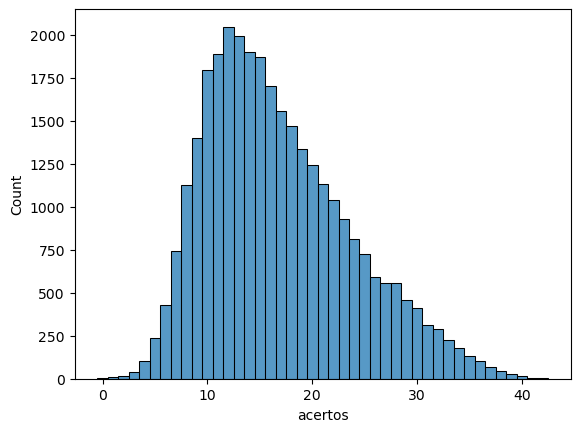

In [170]:
sns.histplot(df['acertos'],discrete=True)

<AxesSubplot:xlabel='inepthetas_eap', ylabel='inepthetasse_eap'>

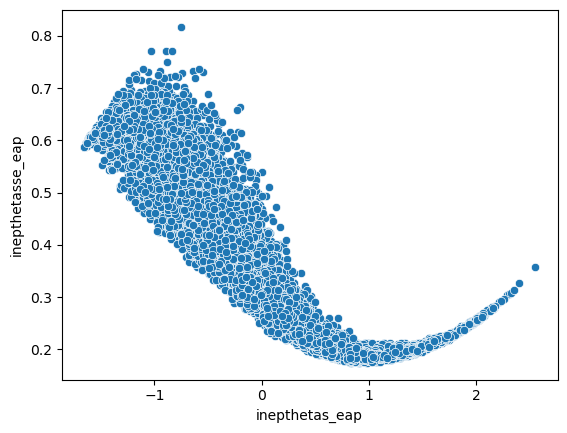

In [61]:
sns.scatterplot(df,x='inepthetas_eap',y='inepthetasse_eap')

Text(0.5, 1.0, 'Reprodução das notas do ENEM 2019\na partir do microdados')

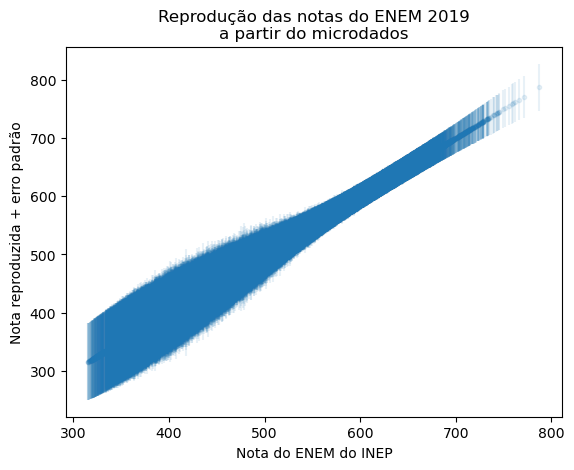

In [64]:
plt.errorbar(df['nota_inep'],df[x]*slope+intercept,yerr=df[xs]*slope,fmt=".",alpha=0.1)
ax = plt.gca()
ax.set_xlabel("Nota do ENEM do INEP")
ax.set_ylabel("Nota reproduzida + erro padrão")
ax.set_title("Reprodução das notas do ENEM 2019\na partir do microdados");


<AxesSubplot:xlabel='inepthetas_eap'>

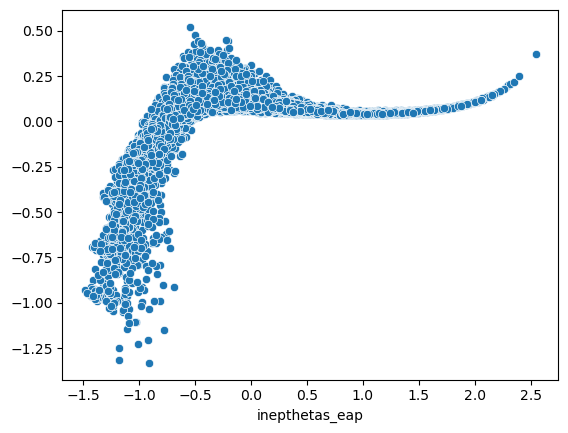

In [188]:
sns.scatterplot(x=df['inepthetas_eap'],y=(df['inepthetas_ml']-df['inepthetas_eap']))

In [46]:
resp0 = resp.iloc[0:10]
resp0

,86751,83820,77940,118034,84811,96447,96302,111820,118033,84769,...,118054,66498,88308,87709,112135,81689,97975,118108,66219,111877
0,0,1,1,0,0,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,0,1,1,0,1,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
3,0,1,1,0,1,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,0
5,0,1,1,0,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,1,1
6,0,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8,0,1,1,0,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,1,0
9,0,1,1,1,0,1,1,0,1,0,...,0,1,1,0,1,1,0,1,0,0


In [52]:
%%R -i mod_inep,resp0,resp,model3pl
respvec <- rep(0,43)
fscores(mod_inep,method="EAP",full.scores=TRUE,full.scores_SE = TRUE,verbose=TRUE,response.pattern = respvec)

            F1     SE_F1
[1,] -1.653506 0.5867472


In [68]:
respvec = [1]*43

In [71]:
mirt.fscores(mod_inep,method="EAP",full_scores=True, full_scores_SE = True,verbose=True ,response_pattern = to_rdf(respvec))


2.9936527317926926,0.4641611263840843
